In [3]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

# 构建包含两个类的简单二维数据并进行可视化

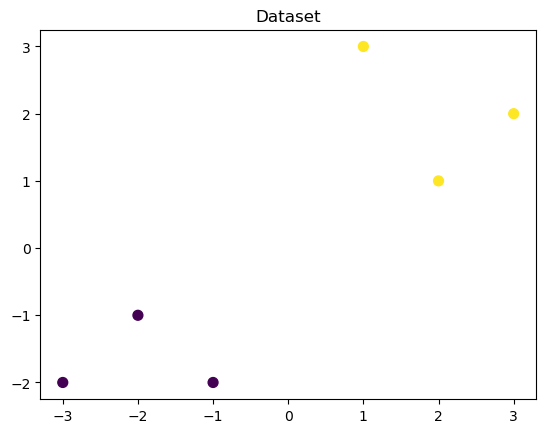

the weight of Logistic Regression: [[0.73454893 0.69549413]]
the intercept(w0) of Logistic Regression: [-0.13154522]


In [4]:
# 构造数据集
x_features = np.array([[-1, -2], [-2, -1], [-3, -2], [1, 3], [2, 1], [3, 2]])
y_label = np.array([0, 0, 0, 1, 1, 1])

# 可视化构造的数据样本点
plt.figure()
# 根据 y_label（标签）设置颜色
plt.scatter(x_features[:, 0], x_features[:, 1], c=y_label, s=50, cmap='viridis')
plt.title('Dataset')
plt.show()

# 调用逻辑回归模型
lr_clf = LogisticRegression()
# 用逻辑回归模型拟合构造的数据集
lr_clf = lr_clf.fit(x_features, y_label) # 其拟合方程为 z = w1 * x1 + w2 * x2 + w0 ，再通过sigmoid函数转为概率 p = 1 / (1 + e^(-z)) 
# 上面的拟合方程也可以看成 ax + by + c = 0
# 查看其对应模型的w（权重/系数），分为w1和w2.
print('the weight of Logistic Regression:', lr_clf.coef_)
# 查看其对应模型的w0（截距/偏置）
print('the intercept(w0) of Logistic Regression:', lr_clf.intercept_)





# 权重和截距的实际用途——使用训练好的权重和截距预测新样本


## 为什么需要线性得分？
概率 p 有界 [0,1]，非线性，难以直接优化

线性得分 z 无界，线性组合，易于计算和优化（如梯度下降）

In [ ]:
# 1. 预测新数据

# 新数据点
new_point = np.array([[0.5, 1.5]])

# 方法1：直接使用模型预测（推荐）
prediction = lr_clf.predict(new_point)
probability = lr_clf.predict_proba(new_point)
print(f"新数据点 {new_point[0]} 的预测:")
print(f"  预测类别: {prediction[0]}")
print(f"  预测概率: 类别0={probability[0][0]:.3f}, 类别1={probability[0][1]:.3f}")

# 方法2：手动计算（使用权重和截距）
w1, w2 = lr_clf.coef_[0]  # [0.73454893, 0.69549413]
w0 = lr_clf.intercept_[0]  # -0.13154522

z = w0 + w1 * new_point[0][0] + w2 * new_point[0][1]
p = 1 / (1 + np.exp(-z))  # sigmoid函数
print("\n手动计算验证:")
print(f"  线性得分 z = {z:.3f}")
print(f"  预测概率 p = {p:.3f}")


新数据点 [0.5 1.5] 的预测:
  预测类别: 1
  预测概率: 类别0=0.218, 类别1=0.782

手动计算验证:
  线性得分 z = 1.279
  预测概率 p = 0.782


/opt/anaconda3/envs/yyf/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/yyf/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 24449 (\N{CJK UNIFIED IDEOGRAPH-5F81}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/yyf/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20915 (\N{CJK UNIFIED IDEOGRAPH-51B3}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/yyf/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 31574 (\N{CJK UNIFIED IDEOGRAPH-7B56}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/yyf/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 36793 (\N{CJK UNIFIE

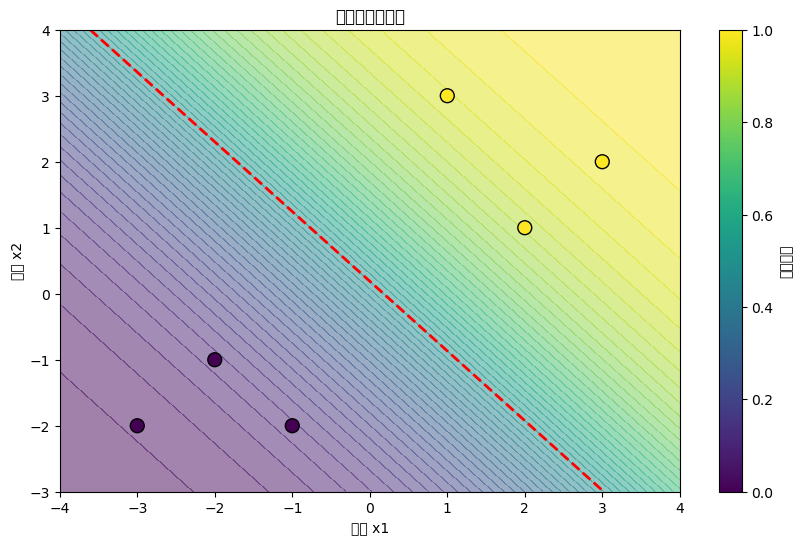

决策边界方程: -0.132 + 0.735*x1 + 0.695*x2 = 0


In [ ]:
# 2. 可视化决策边界
# 决策边界方程: w0 + w1*x1 + w2*x2 = 0
# 可以转换为: x2 = -(w0 + w1*x1) / w2

# 获取权重和截距
w1, w2 = lr_clf.coef_[0]
w0 = lr_clf.intercept_[0]

# 创建网格用于绘制决策边界
# +1和-1是在最小值和最大值基础上各扩展 1 个单位，用于在绘图时留出边距，避免数据点贴边
x1_min, x1_max = x_features[:, 0].min() - 1, x_features[:, 0].max() + 1
x2_min, x2_max = x_features[:, 1].min() - 1, x_features[:, 1].max() + 1
# 在 x1_min 到 x1_max 之间生成 100 个等间距的点
# np.meshgrid 将两个一维数组组合成网格坐标矩阵
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 100),
                       np.linspace(x2_min, x2_max, 100))

# 计算每个网格点的预测概率
grid_points = np.c_[xx1.ravel(), xx2.ravel()]
Z = lr_clf.predict_proba(grid_points)[:, 1]
# 输入形状 (10000,)；输出形状 (100, 100)
Z = Z.reshape(xx1.shape)

# 绘制决策边界和数据点
plt.figure(figsize=(10, 6))
# plt.contourf() 用于绘制填充等高线图（filled contour plot），用颜色填充不同区域，表示数值分布。
plt.contourf(xx1, xx2, Z, levels=50, alpha=0.5, cmap='viridis')
plt.contour(xx1, xx2, Z, levels=[0.5], colors='red', linewidths=2, linestyles='--')
plt.scatter(x_features[:, 0], x_features[:, 1], c=y_label, s=100, cmap='viridis', edgecolors='black')
plt.xlabel('特征 x1')
plt.ylabel('特征 x2')
plt.title('决策边界可视化')
plt.colorbar(label='预测概率')
plt.show()

print(f"决策边界方程: {w0:.3f} + {w1:.3f}*x1 + {w2:.3f}*x2 = 0")


xx1 = [[-4, -2,  0],
       [-4, -2,  0],
       [-4, -2,  0]]

xx2 = [[-3, -3, -3],
       [-1, -1, -1],
       [ 1,  1,  1]]

执行 xx1.ravel()：
xx1.ravel() = [-4, -2, 0, -4, -2, 0, -4, -2, 0]
# 形状: (9,)

执行 np.c_[xx1.ravel(), xx2.ravel()]：
结果 = [[-4, -3],
        [-2, -3],
        [ 0, -3],
        [-4, -1],
        [-2, -1],
        [ 0, -1],
        [-4,  1],
        [-2,  1],
        [ 0,  1]]
# 形状: (9, 2)

lr_clf.predict_proba(grid_points) 的输出
形状：(10000, 2)
```
[
    [p_类别0, p_类别1],  # 第1个网格点的概率
    [p_类别0, p_类别1],  # 第2个网格点的概率
    ...
    [p_类别0, p_类别1]   # 第10000个网格点的概率
]
```

In [ ]:
# 3. 特征重要性分析
# 权重的大小和符号反映了特征对分类结果的影响

w1, w2 = lr_clf.coef_[0]
w0 = lr_clf.intercept_[0]

print("=" * 50)
print("特征重要性分析:")
print("=" * 50)
print(f"特征 x1 的权重 w1 = {w1:.4f}")
print(f"  含义: x1 每增加1个单位，线性得分增加 {w1:.4f}")
print(f"  影响: {'正向' if w1 > 0 else '负向'}影响（权重为{'正' if w1 > 0 else '负'}）")
print()
print(f"特征 x2 的权重 w2 = {w2:.4f}")
print(f"  含义: x2 每增加1个单位，线性得分增加 {w2:.4f}")
print(f"  影响: {'正向' if w2 > 0 else '负向'}影响（权重为{'正' if w2 > 0 else '负'}）")
print()
print(f"截距 w0 = {w0:.4f}")
print("  含义: 当 x1=0, x2=0 时的基础得分")
print()
print("特征重要性比较:")
if abs(w1) > abs(w2):
    print(f"  x1 比 x2 更重要 (|{w1:.4f}| > |{w2:.4f}|)")
else:
    print(f"  x2 比 x1 更重要 (|{w2:.4f}| > |{w1:.4f}|)")


特征重要性分析:
特征 x1 的权重 w1 = 0.7345
  含义: x1 每增加1个单位，线性得分增加 0.7345
  影响: 正向影响（权重为正）

特征 x2 的权重 w2 = 0.6955
  含义: x2 每增加1个单位，线性得分增加 0.6955
  影响: 正向影响（权重为正）

截距 w0 = -0.1315
  含义: 当 x1=0, x2=0 时的基础得分

特征重要性比较:
  x1 比 x2 更重要 (|0.7345| > |0.6955|)
